# Освещенность пола в комнате с несколькими лампами

In [23]:
# used modules
using Test
using Plots
using Interact

In [2]:
# functions of distance
r1(x, y, x0, y0, sp) = sqrt(sp.h^2 + (x - x0)^2 + (y - y0)^2)
r2(x, y, i, sp) = r1(
    x,
    y,
    0.5 * sp.a + sp.R * sin((i - 1) * (2π / sp.N)),
    0.5 * sp.b - sp.R * cos((i - 1) * (2π / sp.N)),
    sp,
)
cosα(x, y, i, sp) = sp.h / r2(x, y, i, sp)
#
O(x, y, i, sp) = sp.I / r2(x, y, i, sp)^2 * cosα(x, y, i, sp)
Otot(x, y, sp) = sum(O(x, y, i, sp) for i = 1:sp.N)

Otot (generic function with 1 method)

## Статический рисунок
 - Комната 5x4 метраб 3 метра высотой,
 - 5 ламп на по кругу диаметром 2 м,
 - Сила света 95 кд

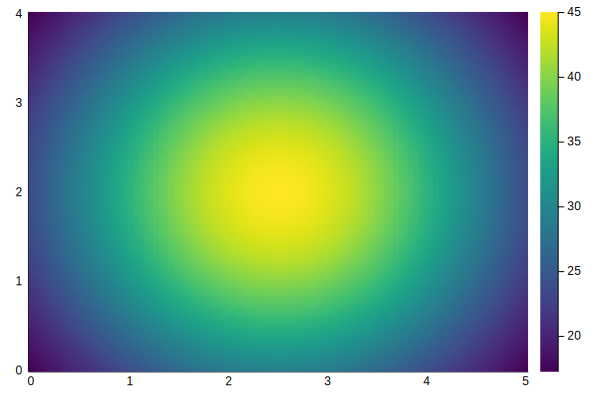

In [8]:
# example of standard setup
standard_setup = (
    a = 5.0, 
    b = 4.0,
    h = 3,
    R = 1.0, # meters
    N = 5, # amount
    I = 95.0,
)

# tests
@test r1(0, 0, 0, 0, standard_setup) ≈ standard_setup.h
@test r1(0, 0, standard_setup.a, standard_setup.b, standard_setup) ≈
    sqrt(standard_setup.h^2 + standard_setup.a^2 + standard_setup.b^2)

# static
let
    xv = range(0, standard_setup.a, length = 100)
    yv = range(0, standard_setup.b, length = 100)
    Ov = [Otot(x, y, standard_setup) for y in yv, x in xv]
    heatmap(xv, yv, Ov, c = :viridis)
end

## Динамический рисунок
 * управляй интенсивностью света
 * Количеством лам
 * растоянием между лампами
 * высотой комнаты

In [22]:
# dynamic set up
@manipulate for I in slider(range(50, 500, length = 451), label="I", value=55),
                N in slider(2:8, label="N", value=5),
                R in slider(range(0.01, 2, length = 200), label="R", value=1.0),
                h in slider(0.1:0.1:3, label="h", value=0.9)
    setup = (a = 5.0, b = 4.0)
    xv = range(0, setup.a, length = 100)
    yv = range(0, setup.b, length = 100)
    Ov = [Otot(x, y, (a = 5.0, b = 4.0, h = h, R = R, N = N, I = I)) for y in yv, x in xv]
    heatmap(xv, yv, Ov, clim = (0, 150), c = :viridis)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["I"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 451,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
6, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\mikha\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\mikha\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\mikha\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\mikha\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\mikha\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000010fa88b0, Task (runnable) @0x0000000010fa88b0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"50.0\",\"51.0\",\"52.0\",\"53.0\",\"54.0\",\"55.0\",\"56.0\",\"57.0\",\"58.0\",\"59.0\",\"60.0\",\"61.0\",\"62.0\",\"63.0\",\"64.0\",\"65.0\",\"66.0\",\"67.0\",\"68.0\",\"69.0\",\"70.0\",\